# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import all necessary tools and libraries for the project
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the twitter enhanced archive csv file into pandas
enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# use the requests .get syntax and the open function to load and write the content of the url.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
tweet_ids = enhanced_df['tweet_id'].values
len(tweet_ids)

2356

In [9]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [7]:
with open('tweet_json.txt', 'r') as file:
    tweets = file.readlines()

tweet_id = []
favorite_count = []
retweet_count = []

for tweet in tweets:
    tweet_text = json.loads(tweet)
    tweet_id.append(tweet_text['id'])
    favorite_count.append(tweet_text['favorite_count'])
    retweet_count.append(tweet_text['retweet_count'])

tweet_df = pd.DataFrame({'tweet_id':tweet_id, 'favorite_count':favorite_count, 'retweet_count':retweet_count})    
tweet_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33828,7010
1,892177421306343426,29343,5302
2,891815181378084864,22068,3482
3,891689557279858688,36956,7227
4,891327558926688256,35326,7767


In [8]:
image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assessing Data
Having loaded the dataframes successfully, it becomes essential to assess the data for errors, missing data, issues of tidiness or completeness, as well as any other issue that may affect the results generrated from the use of the dataset.



In [9]:
# Assessment of the three datasets
enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
tweet_df

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33828,7010
1,892177421306343426,29343,5302
2,891815181378084864,22068,3482
3,891689557279858688,36956,7227
4,891327558926688256,35326,7767
5,891087950875897856,17816,2602
6,890971913173991426,10371,1667
7,890729181411237888,56892,15763
8,890609185150312448,24534,3624
9,890240255349198849,27974,6101


In [12]:
#programmtic assessments of the three datatsets
enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
enhanced_df[enhanced_df['name']=='Bella']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
60,880465832366813184,NaN,NaN,2017-06-29 16:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880465832...,12,10,Bella,None,None,None,None
1089,737800304142471168,NaN,NaN,2016-06-01 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's ubering home after a few ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737800304...,10,10,Bella,None,None,None,None
1354,703631701117943808,NaN,NaN,2016-02-27 17:24:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. Based on this picture she's at ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703631701...,11,10,Bella,None,None,None,None
1768,678389028614488064,NaN,NaN,2015-12-20 01:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She just learned that her final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678389028...,11,10,Bella,None,None,pupper,None
1964,673350198937153538,NaN,NaN,2015-12-06 03:56:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's a Genghis Flopped Canuck....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673350198...,9,10,Bella,None,None,None,None


In [14]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [16]:
enhanced_df.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1427,697630435728322560,NaN,NaN,2016-02-11 03:57:11 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Pls make sure ur dogs have gone through some b...,NaN,NaN,NaN,https://vine.co/v/in7ZzHPKzWz,8,10,None,None,None,None,None
164,860184849394610176,NaN,NaN,2017-05-04 17:30:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have perhaps the wisest dog of all. Ab...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860184849...,14,10,None,None,None,None,None
1348,704347321748819968,NaN,NaN,2016-02-29 16:47:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphson. He's very confused. Wonderin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704347321...,10,10,Ralphson,None,None,pupper,None
2114,670433248821026816,NaN,NaN,2015-11-28 02:45:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sam. He's trying to escape the inordin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670433248...,10,10,Sam,None,None,None,None
176,857746408056729600,NaN,NaN,2017-04-28 00:00:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Thor. He doesn't have finals because he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857746408...,13,10,Thor,None,None,None,None
2257,667728196545200128,NaN,NaN,2015-11-20 15:36:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Olive. He comes to spot by tree to remini...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667728196...,11,10,Olive,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None
2118,670420569653809152,NaN,NaN,2015-11-28 01:54:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Damon. The newest presidential candida...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670420569...,10,10,Damon,None,None,None,None
1787,677565715327688705,NaN,NaN,2015-12-17 19:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Contortionist pup here. Inside pentagram. Clea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677565715...,6,10,None,None,None,None,None
1292,708109389455101952,NaN,NaN,2016-03-11 01:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He was caught off guard by ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708109389...,10,10,Remington,None,None,None,None


In [17]:
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1135,728751179681943552,https://pbs.twimg.com/media/Ch0LVPdW0AEdHgU.jpg,1,Saint_Bernard,0.482050,True,collie,0.202740,True,borzoi,0.037976,True
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True
1117,725786712245440512,https://pbs.twimg.com/media/ChKDKmIWIAIJP_e.jpg,1,chow,0.335761,True,Samoyed,0.167173,True,kuvasz,0.145715,True
1852,840632337062862849,https://pbs.twimg.com/media/C6qGphPV4AEKrdc.jpg,1,golden_retriever,0.711148,True,cocker_spaniel,0.157929,True,Labrador_retriever,0.059582,True
1488,782305867769217024,https://pbs.twimg.com/media/CttPBt0WIAAcsDE.jpg,1,briard,0.504427,True,soft-coated_wheaten_terrier,0.390678,True,Lhasa,0.034596,True


In [18]:
tweet_df.sample(5)

,tweet_id,favorite_count,retweet_count
164,858860390427611136,0,7091
1454,693267061318012928,2206,735
1732,678675843183484930,2608,1321
921,752309394570878976,0,14916
2123,669680153564442624,588,245


In [19]:
print(enhanced_df.groupby('doggo').tweet_id.count())
print('\n')
print(enhanced_df.groupby('floofer').tweet_id.count())
print('\n')
print(enhanced_df.groupby('pupper').tweet_id.count())
enhanced_df.groupby('puppo').tweet_id.count()

doggo
None     2259
doggo      97
Name: tweet_id, dtype: int64


floofer
None       2346
floofer      10
Name: tweet_id, dtype: int64


pupper
None      2099
pupper     257
Name: tweet_id, dtype: int64


puppo
None     2326
puppo      30
Name: tweet_id, dtype: int64

In [20]:
enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
enhanced_df.groupby('rating_numerator').tweet_id.count()

rating_numerator
0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: tweet_id, dtype: int64

In [22]:
enhanced_df.groupby('rating_denominator').tweet_id.count()

rating_denominator
0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: tweet_id, dtype: int64

### Quality issues

`enhanced_df` table:
- `timestamp` column in the wrong datatype

- incorrect entries (eg. an, a, the) in the `name` column

- retweeted ratings exist within the dataset (eg. index 19 shows values in the `retweeted_status_id` & `retweeted_status_user_id` columns)

- rating_numrator column extracted incorrectly (ratings with decimals are partially read, with only the decimal number part being printed)  

- missing values in the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` and the expanded_url columns

- the dog stage "floof" incorrectly named as "floofer"

- missing values in the `doggo`, `floofer`, `pupper` and `puppo` columns (replaced by "None")

- unnecessary columns (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` and the `expanded_url` columns)

`image_df` table:
- some rows in the algorithm confidence columns (i.e. p1_dog, p2_dog, p3_dog) are False 

- column names are not explicit and clear (p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog)

- missing row values (2075 out of 2356)

- unnecessary columns (jpg_url, img_num, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf,	p3_dog)

`tweet_df` table:
- missing row values (2327 out of 2356)

- wrong datatypes (favorite counts and retweet counts should be strings)

### Tidiness issues
- existence of four columns for dog stages instead of one

- existence of three dataframes instead of one


## Cleaning Data
Here, the listed issues above will be cleaned using tools and syntax from libraries loaded at the beginning of the project

In [23]:
# Make copies of original pieces of data
enhanced_clean = enhanced_df.copy()
image_prediction_clean = image_df.copy()
tweet_clean = tweet_df.copy()

### Tidiness

#### Existence of four columns for dog stages instead of one

#### Define

combine the `doggo`, `floofer`, `pupper` and `puppo` columns into one columns named `dog_stage`.

#### Code

In [24]:
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in dog_stages:
    enhanced_clean[stage].replace({"None":''},inplace=True)
enhanced_clean['dog_stage'] = (enhanced_clean.doggo + enhanced_clean.floofer + enhanced_clean.pupper + enhanced_clean.puppo)

In [25]:
enhanced_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'],inplace=True)

In [26]:
enhanced_clean = enhanced_clean[enhanced_clean['dog_stage'] != 'doggofloofer']
enhanced_clean = enhanced_clean[enhanced_clean['dog_stage'] != 'doggopupper']
enhanced_clean = enhanced_clean[enhanced_clean['dog_stage'] != 'doggopuppo']

#### Test

In [27]:
enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


In [28]:
enhanced_clean.groupby('dog_stage').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name
dog_stage,,,,,,,,,,,,,
,1976,70,70,1976,1976,1976,145,145,145,1923,1976,1976,1976
doggo,83,3,3,83,83,83,8,8,8,80,83,83,83
floofer,9,0,0,9,9,9,0,0,0,9,9,9,9
pupper,245,3,3,245,245,245,21,21,21,243,245,245,245
puppo,29,1,1,29,29,29,5,5,5,28,29,29,29


In [29]:
enhanced_clean.replace("",'None',inplace=True)

In [30]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2342 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2342 non-null object
source                        2342 non-null object
text                          2342 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2283 non-null object
rating_numerator              2342 non-null int64
rating_denominator            2342 non-null int64
name                          2342 non-null object
dog_stage                     2342 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 274.5+ KB


#### Existence of three dataframes instead of one

#### Define

merge the three dataframes together into one using the tweet_id column as key

#### Code

In [31]:
enhanced_clean = enhanced_clean.merge(image_prediction_clean, on='tweet_id', how='left')
combined_clean = enhanced_clean.merge(tweet_clean, on='tweet_id', how='left')

#### Test

In [32]:
print(combined_clean.info())
combined_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 27 columns):
tweet_id                      2342 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2342 non-null object
source                        2342 non-null object
text                          2342 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2283 non-null object
rating_numerator              2342 non-null int64
rating_denominator            2342 non-null int64
name                          2342 non-null object
dog_stage                     2342 non-null object
jpg_url                       2062 non-null object
img_num                       2062 non-null float64
p1                            2062 non-null object
p1_conf                       2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33828.0,7010.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29343.0,5302.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22068.0,3482.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,36956.0,7227.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35326.0,7767.0


### Quality

#### Missing Row Values, Present Retweeted Ratings row and Unnecessary Columns

#### Define

Drop unnecessary columns, rows where `retweeted_status_id` is not null, and rows with missing values that serve no use to the project

#### Code

In [33]:
remove = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_user_id',
                    'retweeted_status_timestamp', 'expanded_urls', 'name', 'jpg_url', 'img_num', 'p1_conf', 'p2', 
                    'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
combined_clean.drop(columns = remove, inplace=True)

In [34]:
combined_clean.isnull().sum()

tweet_id                  0
timestamp                 0
text                      0
retweeted_status_id    2163
rating_numerator          0
rating_denominator        0
dog_stage                 0
p1                      280
p1_dog                  280
favorite_count           29
retweet_count            29
dtype: int64

In [35]:
combined_clean = combined_clean[combined_clean['p1'].notna()]
combined_clean = combined_clean[combined_clean['favorite_count'].notna()]
combined_clean = combined_clean[combined_clean['retweet_count'].notna()]
combined_clean = combined_clean[combined_clean['retweeted_status_id'].isna()]

#### Test

In [36]:
combined_clean.isnull().sum()

tweet_id                  0
timestamp                 0
text                      0
retweeted_status_id    1975
rating_numerator          0
rating_denominator        0
dog_stage                 0
p1                        0
p1_dog                    0
favorite_count            0
retweet_count             0
dtype: int64

In [37]:
combined_clean.head()

,tweet_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,dog_stage,p1,p1_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,None,orange,False,33828.0,7010.0
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,None,Chihuahua,True,29343.0,5302.0
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,None,Chihuahua,True,22068.0,3482.0
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,13,10,None,paper_towel,False,36956.0,7227.0
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,12,10,None,basset,True,35326.0,7767.0


In [38]:
combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 2341
Data columns (total 11 columns):
tweet_id               1975 non-null int64
timestamp              1975 non-null object
text                   1975 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       1975 non-null int64
rating_denominator     1975 non-null int64
dog_stage              1975 non-null object
p1                     1975 non-null object
p1_dog                 1975 non-null object
favorite_count         1975 non-null float64
retweet_count          1975 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 185.2+ KB


#### Renaming the `p1` column into `dog_breed`, rename non-dog names into None while comparing with the `p1_dog` column, and dropping the `p1_dog` and `retweeted_status_id` columns

#### Define

Rename the `p1` column into `dog_breed`, rename non-dog names as None, drop the `p1_dog` column

#### Test

In [39]:
#generate the list of all the non_dog names within the dataframe,
non_dog = combined_clean[combined_clean['p1_dog']==False]
non_dog.p1.unique()

array(['orange', 'paper_towel', 'limousine', 'convertible', 'web_site',
       'tusker', 'street_sign', 'tricycle', 'tabby', 'basketball',
       'home_theater', 'comic_book', 'laptop', 'pole', 'marmot', 'syringe',
       'lakeside', 'chimpanzee', 'Angora', 'revolver', 'grille', 'barbell',
       'prison', 'barrow', 'car_mirror', 'tennis_ball', 'patio',
       'fountain', 'sea_lion', 'white_wolf', 'washer', 'tub',
       'military_uniform', 'teapot', 'swing', 'birdhouse', 'shopping_cart',
       'mortarboard', 'leopard', 'wooden_spoon', 'hyena', 'ice_bear',
       'toilet_tissue', 'ox', 'bath_towel', 'seat_belt', 'hippopotamus',
       'teddy', 'dingo', 'cowboy_boot', 'bathtub', 'school_bus',
       'acorn_squash', 'restaurant', 'doormat', 'Siamese_cat', 'loupe',
       'Arabian_camel', 'shield', 'bookcase', 'minivan', 'vacuum',
       'gas_pump', 'pedestal', 'bakery', "jack-o'-lantern", 'dishwasher',
       'refrigerator', 'remote_control', 'beach_wagon', 'quilt',
       'pool_table',

In [40]:
#replace the non_dog names with'no_breed', rename the p1 column and drop the p1_dog column
combined_clean.p1.replace(non_dog.p1.unique(),'no_breed',inplace=True)
combined_clean.rename(columns = {'p1':'dog_breed'}, inplace=True)
combined_clean.drop(columns = ['p1_dog', 'retweeted_status_id'], inplace=True)

#### Test

In [41]:
combined_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,dog_breed,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,None,no_breed,33828.0,7010.0
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,None,Chihuahua,29343.0,5302.0
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,None,Chihuahua,22068.0,3482.0
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,None,no_breed,36956.0,7227.0
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,None,basset,35326.0,7767.0


#### timestamp, favorite_count and retweet_count columns in wrong datatype

#### Define

convert the timestamp column into the datetime datatype, and the favorite_count and retweet_count columns into string

#### Code

In [42]:
combined_clean['timestamp'] = pd.to_datetime(combined_clean['timestamp'])

In [43]:
combined_clean['favorite_count'] = combined_clean['favorite_count'].astype(str).str[:-2]
combined_clean['retweet_count'] = combined_clean['retweet_count'].astype(str).str[:-2]

#### Test

In [44]:
combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 2341
Data columns (total 9 columns):
tweet_id              1975 non-null int64
timestamp             1975 non-null datetime64[ns]
text                  1975 non-null object
rating_numerator      1975 non-null int64
rating_denominator    1975 non-null int64
dog_stage             1975 non-null object
dog_breed             1975 non-null object
favorite_count        1975 non-null object
retweet_count         1975 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 154.3+ KB


In [45]:
combined_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,dog_breed,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,None,no_breed,33828,7010
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,None,Chihuahua,29343,5302
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,None,Chihuahua,22068,3482
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,None,no_breed,36956,7227
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,None,basset,35326,7767


#### the dog stage "floof" incorrectly named as "floofer"

#### Define

Rename the values tagged as 'floofer' back to 'floof' in the `dog_stage` column

#### Code

In [46]:
combined_clean['dog_stage'] = combined_clean['dog_stage'].replace('floofer', 'floof')

#### Test

In [47]:
combined_clean['dog_stage'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floof'], dtype=object)

#### `rating_numerator` column extracted incorrectly (ratings with decimals are partially read, with only the decimal number part being printed)  

#### Define

Extract from the `text` column in the dataset the rating values, then split in order to generate `new_rating_numerator` and `new_rating_denominator` columns. 

#### Code

In [48]:
combined_clean[['full_rating', 'dump']] = combined_clean['text'].str.extract('((\d+.)?\d+/\d\d+)', expand = True)
combined_clean['new_rating_numerator'] = combined_clean.full_rating.str.split("/",expand=True)[0]
combined_clean['new_rating_denominator'] = combined_clean.full_rating.str.split("/",expand=True)[1]

#### Test

In [49]:
print(combined_clean.new_rating_numerator.value_counts())
combined_clean.new_rating_denominator.value_counts()

12       443
10       416
11       394
13       255
9        152
8         95
7         52
14        35
6         32
5         31
3         19
4         16
2          9
1          4
0          2
44         1
420        1
11.26      1
144        1
60         1
165        1
11.27      1
99         1
121        1
143        1
84         1
45         1
88         1
204        1
13.5       1
80         1
50         1
1776       1
9.75       1
Name: new_rating_numerator, dtype: int64


10     1958
50        3
80        2
11        2
170       1
20        1
90        1
70        1
110       1
150       1
120       1
130       1
40        1
Name: new_rating_denominator, dtype: int64

#### Define

Drop the `text`, `dump`, `full_rating`, `rating_numerator` and `rating_denominator` columns, drop missing values in the `new_rating_numerator` and `new_rating_denominator` columns and convert the datatypes to float.

In [50]:
combined_clean[combined_clean.new_rating_numerator.isnull()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,dog_breed,favorite_count,retweet_count,full_rating,dump,new_rating_numerator,new_rating_denominator
513,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,None,golden_retriever,5062,1335,NaN,NaN,NaN,NaN


In [51]:
combined_clean[combined_clean.new_rating_denominator.isnull()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,dog_breed,favorite_count,retweet_count,full_rating,dump,new_rating_numerator,new_rating_denominator
513,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,None,golden_retriever,5062,1335,NaN,NaN,NaN,NaN


In [52]:
combined_clean.drop(columns = ['full_rating', 'rating_numerator', 'rating_denominator', 'text', 'dump'], inplace=True)
combined_clean = combined_clean[combined_clean['new_rating_numerator'].notna()]
combined_clean = combined_clean[combined_clean['new_rating_denominator'].notna()]

In [53]:
combined_clean['new_rating_numerator'] = combined_clean['new_rating_numerator'].astype(float)
combined_clean['new_rating_denominator'] = combined_clean['new_rating_denominator'].astype(float)

#### Test

In [54]:
combined_clean.head()

,tweet_id,timestamp,dog_stage,dog_breed,favorite_count,retweet_count,new_rating_numerator,new_rating_denominator
0,892420643555336193,2017-08-01 16:23:56,None,no_breed,33828,7010,13.0,10.0
1,892177421306343426,2017-08-01 00:17:27,None,Chihuahua,29343,5302,13.0,10.0
2,891815181378084864,2017-07-31 00:18:03,None,Chihuahua,22068,3482,12.0,10.0
3,891689557279858688,2017-07-30 15:58:51,None,no_breed,36956,7227,13.0,10.0
4,891327558926688256,2017-07-29 16:00:24,None,basset,35326,7767,12.0,10.0


In [55]:
combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 2341
Data columns (total 8 columns):
tweet_id                  1974 non-null int64
timestamp                 1974 non-null datetime64[ns]
dog_stage                 1974 non-null object
dog_breed                 1974 non-null object
favorite_count            1974 non-null object
retweet_count             1974 non-null object
new_rating_numerator      1974 non-null float64
new_rating_denominator    1974 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 138.8+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
combined_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [57]:
df = pd.read_csv('twitter_archive_master.csv')

In [58]:
df.head()

,tweet_id,timestamp,dog_stage,dog_breed,favorite_count,retweet_count,new_rating_numerator,new_rating_denominator
0,892420643555336193,2017-08-01 16:23:56,None,no_breed,33828,7010,13.0,10.0
1,892177421306343426,2017-08-01 00:17:27,None,Chihuahua,29343,5302,13.0,10.0
2,891815181378084864,2017-07-31 00:18:03,None,Chihuahua,22068,3482,12.0,10.0
3,891689557279858688,2017-07-30 15:58:51,None,no_breed,36956,7227,13.0,10.0
4,891327558926688256,2017-07-29 16:00:24,None,basset,35326,7767,12.0,10.0


In [59]:
df.describe()

,tweet_id,favorite_count,retweet_count,new_rating_numerator,new_rating_denominator
count,1.974000e+03,1974.000000,1974.000000,1974.000000,1974.00000
mean,7.352626e+17,7675.117528,2232.508105,12.242036,10.54306
std,6.739185e+16,11348.202850,4010.046988,41.678863,7.35460
min,6.660209e+17,66.000000,11.000000,0.000000,10.00000
25%,6.757507e+17,1630.000000,493.000000,10.000000,10.00000
50%,7.079828e+17,3425.000000,1070.500000,11.000000,10.00000
75%,7.866477e+17,9558.750000,2551.000000,12.000000,10.00000
max,8.924206e+17,144960.000000,70791.000000,1776.000000,170.00000


In [60]:
dog_breed_count = df.groupby('dog_breed').tweet_id.count().sort_values(ascending=False)
dog_breed_count.head()

dog_breed
no_breed              516
golden_retriever      134
Labrador_retriever     91
Pembroke               88
Chihuahua              79
Name: tweet_id, dtype: int64

In [61]:
df.dog_breed.unique()

array(['no_breed', 'Chihuahua', 'basset', 'Chesapeake_Bay_retriever',
       'Appenzeller', 'Pomeranian', 'Irish_terrier', 'Pembroke', 'Samoyed',
       'French_bulldog', 'golden_retriever', 'whippet', 'Siberian_husky',
       'Mexican_hairless', 'kuvasz', 'pug', 'Blenheim_spaniel', 'malamute',
       'Italian_greyhound', 'chow', 'German_shepherd', 'Doberman',
       'Eskimo_dog', 'Labrador_retriever', 'Weimaraner', 'Saluki',
       'miniature_pinscher', 'German_short-haired_pointer',
       'English_springer', 'vizsla', 'bloodhound', 'Bernese_mountain_dog',
       'West_Highland_white_terrier', 'cocker_spaniel',
       'flat-coated_retriever', 'Cardigan', 'Newfoundland',
       'Shetland_sheepdog', 'komondor', 'kelpie',
       'Greater_Swiss_Mountain_dog', 'Border_collie', 'bull_mastiff',
       'Staffordshire_bullterrier', 'Lakeland_terrier',
       'Australian_terrier', 'Bedlington_terrier', 'Boston_bull',
       'Old_English_sheepdog', 'black-and-tan_coonhound', 'Great_Dane',
     

In [63]:
rating_count = df.groupby('new_rating_numerator').tweet_id.count()
rating_count

new_rating_numerator
0.00         2
1.00         4
2.00         9
3.00        19
4.00        16
5.00        31
6.00        32
7.00        52
8.00        95
9.00       152
9.75         1
10.00      416
11.00      394
11.26        1
11.27        1
12.00      443
13.00      255
13.50        1
14.00       35
44.00        1
45.00        1
50.00        1
60.00        1
80.00        1
84.00        1
88.00        1
99.00        1
121.00       1
143.00       1
144.00       1
165.00       1
204.00       1
420.00       1
1776.00      1
Name: tweet_id, dtype: int64

### Insights:
From the summary statistics above, we can deduce some important pointers
1. the dogs on the WeRateDogs Twitter page averagely had a rating greater than 12, with most dogs falling in the 10, 11, 12 and 13 ratings.

2. The WeRateDogs Twitter page boast a high followership for each post, with an average of approximately 2233 retweets. However, the page has also great highs, with a post generating as much as 70791 retweets.

3. Users seem have a huge likeness for the content being produced by the WeRateDogs page, judging from an average of 7675 favorite counts per post, and a maximum high of 144960 for one single post. As such, the followers and users of the twitter page seem to be overly satisified with the content being curated on the page.

4. There are a lot of breed being displayed on the WeRateDogs Twitter page, with breeds like Golden Retriever, Labrador Retriever, Pembroke and Chihuahua all being showcased more than once. This is a testament to the diversity of the dog breeds on the page.

### Visualization

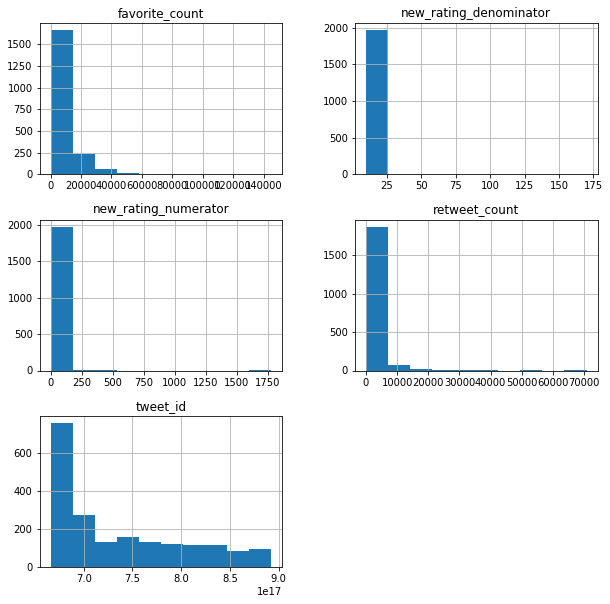

In [64]:
df.hist(figsize= (10,10));

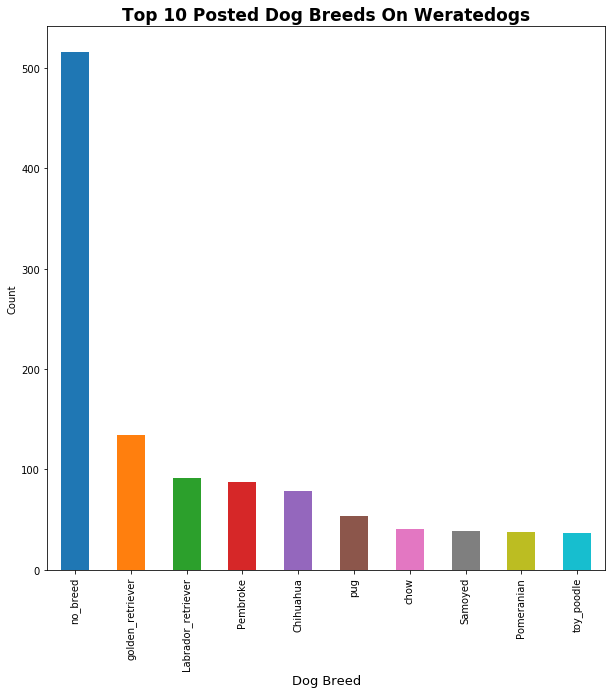

In [65]:
dog_breed_count.head(10).plot.bar(figsize=(10,10))
plt.title('Top 10 Posted Dog Breeds on WeRateDogs'.title(), fontsize =17, weight = "bold")
plt.xlabel('Dog Breed'.title(), fontsize =13)
plt.ylabel('Count'.title(), fontsize=10);

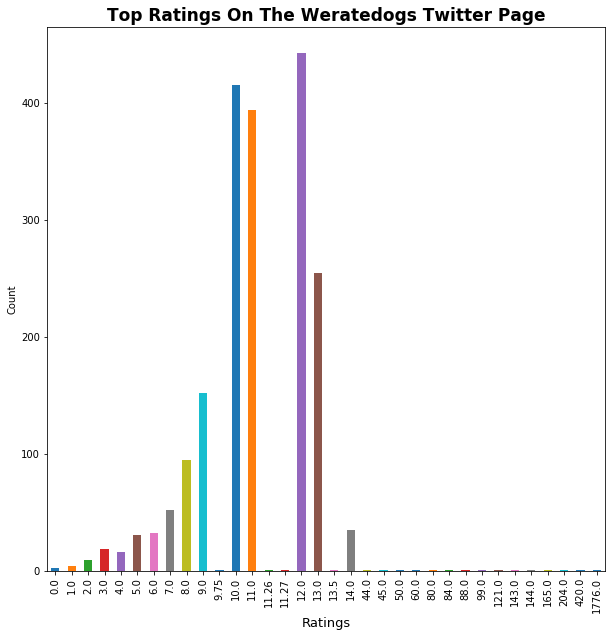

In [66]:
rating_count.plot.bar(figsize=(10,10))
plt.title('Top Ratings on the WeRateDogs Twitter Page'.title(), fontsize =17, weight = "bold")
plt.xlabel('Ratings'.title(), fontsize =13)
plt.ylabel('Count'.title(), fontsize=10);

In [67]:
df.to_csv('twitter_archive_master_visual.csv', index=False)